In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mplot
%matplotlib inline

In [39]:
df=pd.read_csv("q2.csv",names=["x1","x2","y"])
df.insert(0,"x0",np.ones(len(df)))
df.insert(1,"x1square",df.iloc[:,1].apply(lambda x:x*x))
df.insert(2,"x2square",df.iloc[:,2].apply(lambda x:x*x))
df.head(2)

,x0,x1square,x2square,x1,x2,y
0,1.0,0.002628,0.002628,0.051267,0.69956,1
1,1.0,0.008601,0.008601,-0.092742,0.68494,1


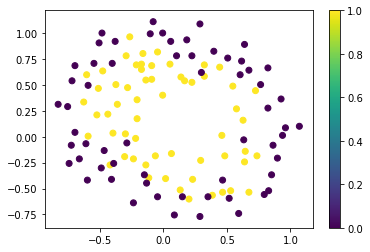

In [42]:
mplot.scatter(df.x1,df.x2,c=df.y)
mplot.colorbar()

In [54]:
xd=df.values[:,:3]
yd=df.values[:,-1:]

index=np.arange(len(xd))
np.random.shuffle(index)
xd=xd[index]
yd=yd[index]

tod_do=0.7
xtrain,ytrain=xd[:int(len(xd)*tod_do),:],yd[:int(len(yd)*tod_do)]
xtest,ytest=xd[int(len(xd)*tod_do):,:],yd[int(len(yd)*tod_do):]

inp=xtrain.shape[1]
out=ytrain.shape[1]
lamb=100
lr=0.001
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape,inp,out

((82, 3), (82, 1), (36, 3), (36, 1), 3, 1)

In [57]:
def initw(flag):
    if(flag):
        global w
        w=np.random.randn(inp,out)
def sigmoid(x):
    return 1/(1+np.exp(-x))
def forward(x):
    y=np.matmul(x,w)
    return y
def loss(y,y_):
    l = -(y*np.log(y_) + (1-y)*np.log(1-y_))
    return l.mean()
def gradients(dw,x):
    g = dw*x
    return g.mean()

In [66]:
w=np.random.randn(inp,out)
w.shape,w

((3, 1), array([[-1.01646718],
        [-0.17497383],
        [-1.21901152]]))

In [67]:
earr=[]
larr=[]
def train():
    for epoch in range(50000):
        output=forward(xtrain)
        output=sigmoid(output)
        dw=(output-ytrain)

        earr.append(epoch)
        larr.append(loss(ytrain,output))


        for i in range(len(w)):
            grad=gradients(dw,xtrain[:,i:i+1])
            w[i] = w[i] - lr*grad
        
train()
print(w)

[[ 0.63922364]
 [-0.57967541]
 [-1.6237131 ]]


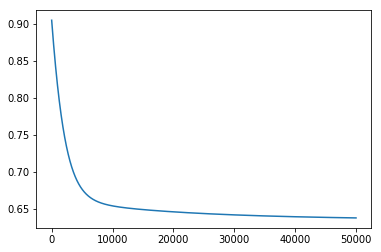

In [68]:
mplot.plot(earr,larr)

In [69]:
pred=np.ravel(sigmoid(forward(xtest)))
pred=np.array([round(p) for p in pred])
acc=np.mean(np.equal(pred,ytest.ravel()))
print("accuracy : {}".format(acc*100))

accuracy : 72.22222222222221


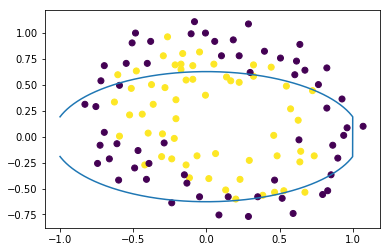

In [84]:
xpoints=np.linspace(-1,1,100000)
def cal(x):
    wt=w.flatten()
    fir=(wt[0]/wt[2])
    sec=(wt[1]/wt[2])*(x*x)
    return np.sqrt(-fir-sec)

mplot.scatter(df.x1,df.x2,c=df.y)
xp,yp=xpoints,cal(xpoints)
xp=np.append(xp,np.flip(xp,0))
yp=np.append(yp,np.flip(-1*yp,0))
mplot.plot(xp,yp)